In [2]:
import os
import pandas as pd
import csv

In [3]:
def load_csv_file(file_path):
    data = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        for row in csv_reader:
            data.append(row)

    return data

In [4]:
folder_name = "congestion"
file_name = "congestion.csv"
file_path = os.path.join(folder_name, file_name)
file_path

'congestion\\congestion.csv'

In [5]:
congestion_data_df = pd.read_csv(file_path)
congestion_data_df

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305
5,60,60,0,0,100,150s,150s,0.738816
6,70,70,0,0,100,150s,150s,NaN
7,10,20,0,0,100,150s,150s,NaN
8,20,25,0,0,100,150s,150s,NaN
9,30,40,0,0,100,150s,150s,NaN


In [6]:
test_data = congestion_data_df[:6]
test_data

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305
5,60,60,0,0,100,150s,150s,0.738816


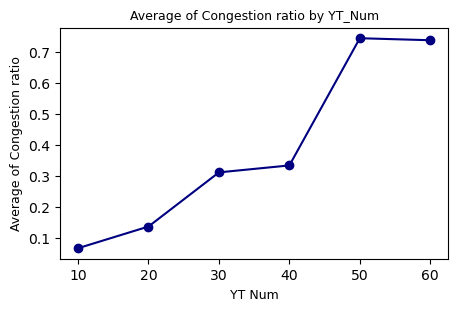

In [9]:
import matplotlib.pyplot as plt

x_values = test_data['YT Num']
y_values = test_data['Average of Congestion ratio']

plt.figure(figsize=(5, 3))
# plt.scatter(test_data['YT Num'], test_data['Average of Congestion ratio'])
plt.plot(x_values, y_values , marker='o', linestyle='-', color = 'navy')
plt.title('Average of Congestion ratio by YT_Num', fontsize=9, ha='center')
plt.xlabel('YT Num', fontsize = 9)
plt.ylabel('Average of Congestion ratio', fontsize = 9)
plt.show()

In [36]:
import function as f
import pandas as pd

folder_name = 'congestion/prev_LP_0_20_80/'
congestion_all_csv_data = f.load_csv_files_in_folder(folder_name)

columns = ['Truck_num'] + congestion_all_csv_data[0][1][0]


data_list = []

for file_name, file_data in congestion_all_csv_data:
    truck_num = file_name.split('_')[2]
    
    for row in file_data[1:]:
        # print(row)
        row[4:] = [float(value) for value in row[4:]]
        new_row = [truck_num] + row
        data_list.append(new_row)

congestion_df = pd.DataFrame(data_list, columns=columns)
congestion_df


,Truck_num,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,10,Truck-3,Route-3,(425.0 0.0 155.5),(375.0 0.0 200.0),343.188,7.656,30.544
1,10,Truck-4,Route-4,(675.0 0.0 205.5),(375.0 0.0 100.0),347.320,7.656,34.688
2,10,Truck-8,Route-8,(675.0 0.0 5.5),(625.0 0.0 200.0),359.644,7.656,47.004
3,10,Truck-6,Route-6,(175.0 0.0 -5.5),(625.0 0.0 200.0),363.304,17.516,40.804
4,10,Truck-9,Route-9,(675.0 0.0 55.5),(125.0 0.0 200.0),367.644,7.656,54.996
...,...,...,...,...,...,...,...,...
380,60,Truck-58,Route-58,(175.0 0.0 155.5),(125.0 0.0 50.0),535.632,39.700,123.932
381,60,Truck-55,Route-55,(175.0 0.0 5.5),(375.0 0.0 100.0),547.372,54.464,103.924
382,60,Truck-42,Route-42,(675.0 0.0 55.5),(125.0 0.0 200.0),561.732,41.044,215.700
383,60,Truck-18,Route-18,(175.0 0.0 55.5),(375.0 0.0 200.0),570.548,10.348,255.224
